In [1]:
# Imports
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Fetch Heart Disease Dataset from UCI
heart_disease = fetch_ucirepo(id=45)

# Separate features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features + target for easier preprocessing
df = pd.concat([X, y], axis=1)

print("Dataset shape:", df.shape)

Dataset shape: (303, 14)


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [7]:
y.value_counts()

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [10]:
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)


C:\Users\My Lap\AppData\Local\Temp\ipykernel_9052\1007957719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].mode()[0], inplace=True)
C:\Users\My Lap\AppData\Local\Temp\ipykernel_9052\1007957719.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<Axes: >

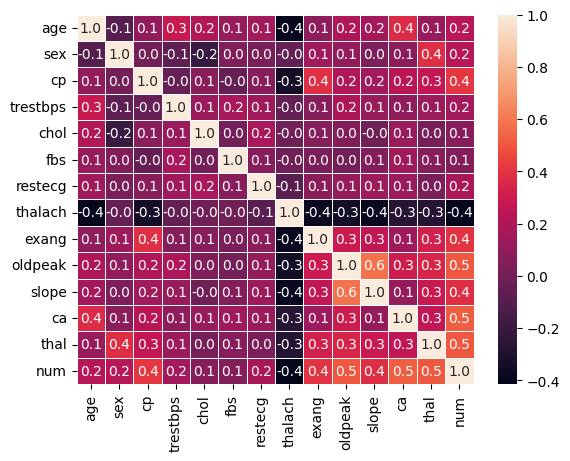

In [12]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt=".1f",linewidths=0.5)

In [13]:
cor=df.corr()

In [14]:
correlation = cor.corr()["num"].sort_values(ascending=False)

print("Correlation Score:\n")
print(correlation)

Correlation Score:

num         1.000000
oldpeak     0.744067
thal        0.731335
ca          0.691191
exang       0.646918
cp          0.642130
slope       0.613800
age         0.334766
sex         0.248742
restecg     0.059784
trestbps   -0.008459
chol       -0.148945
fbs        -0.182416
thalach    -0.821077
Name: num, dtype: float64


In [15]:
cor_drop_col=["trestbps","chol","fbs","thalach"]
df_backup = df.copy()
df.drop(columns=cor_drop_col,inplace=True)


In [16]:
df

,age,sex,cp,restecg,exang,oldpeak,slope,ca,thal,num
0,63,1,1,2,0,2.3,3,0.0,6.0,0
1,67,1,4,2,1,1.5,2,3.0,3.0,2
2,67,1,4,2,1,2.6,2,2.0,7.0,1
3,37,1,3,0,0,3.5,3,0.0,3.0,0
4,41,0,2,2,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,0,0,1.2,2,0.0,7.0,1
299,68,1,4,0,0,3.4,2,2.0,7.0,2
300,57,1,4,0,1,1.2,2,1.0,7.0,3
301,57,0,2,2,0,0.0,2,1.0,3.0,1


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>, <Axes: title={'center': 'thal'}>],
       [<Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

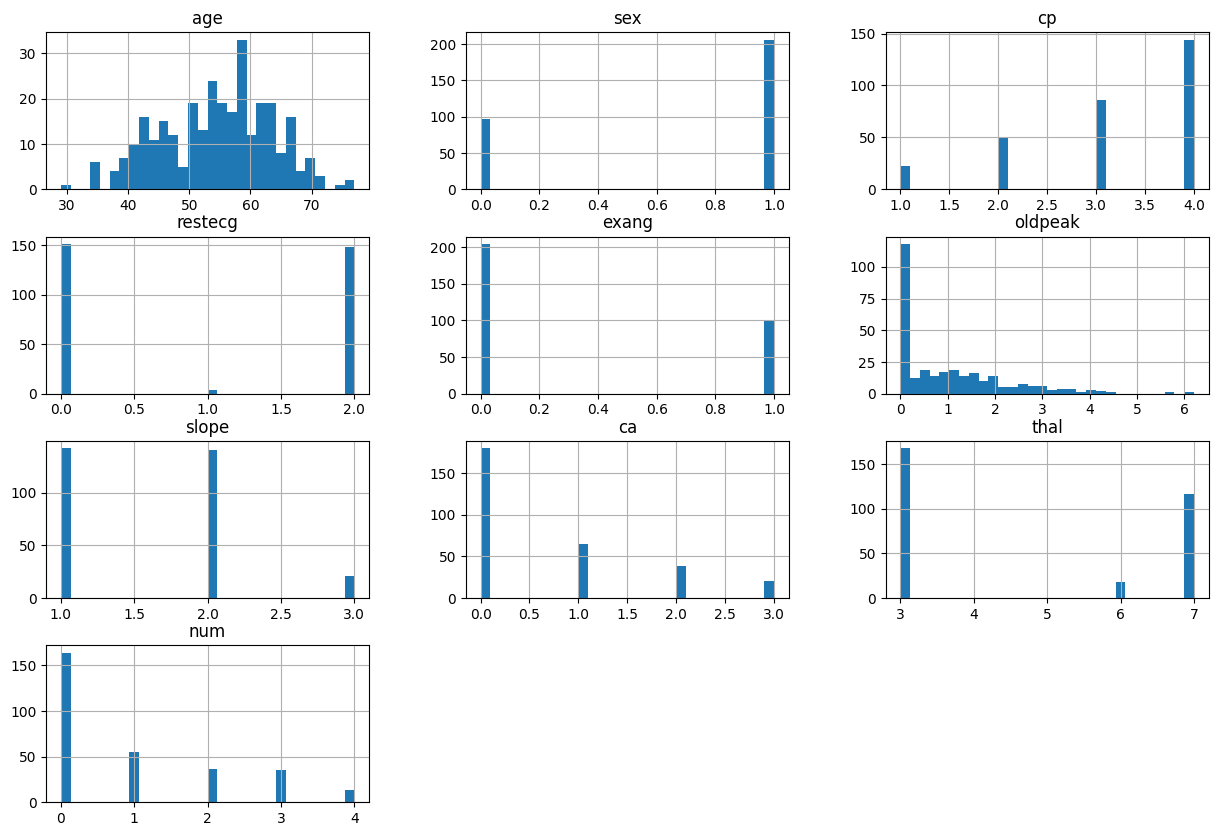

In [18]:
df.hist(bins=30, figsize=(15,10))

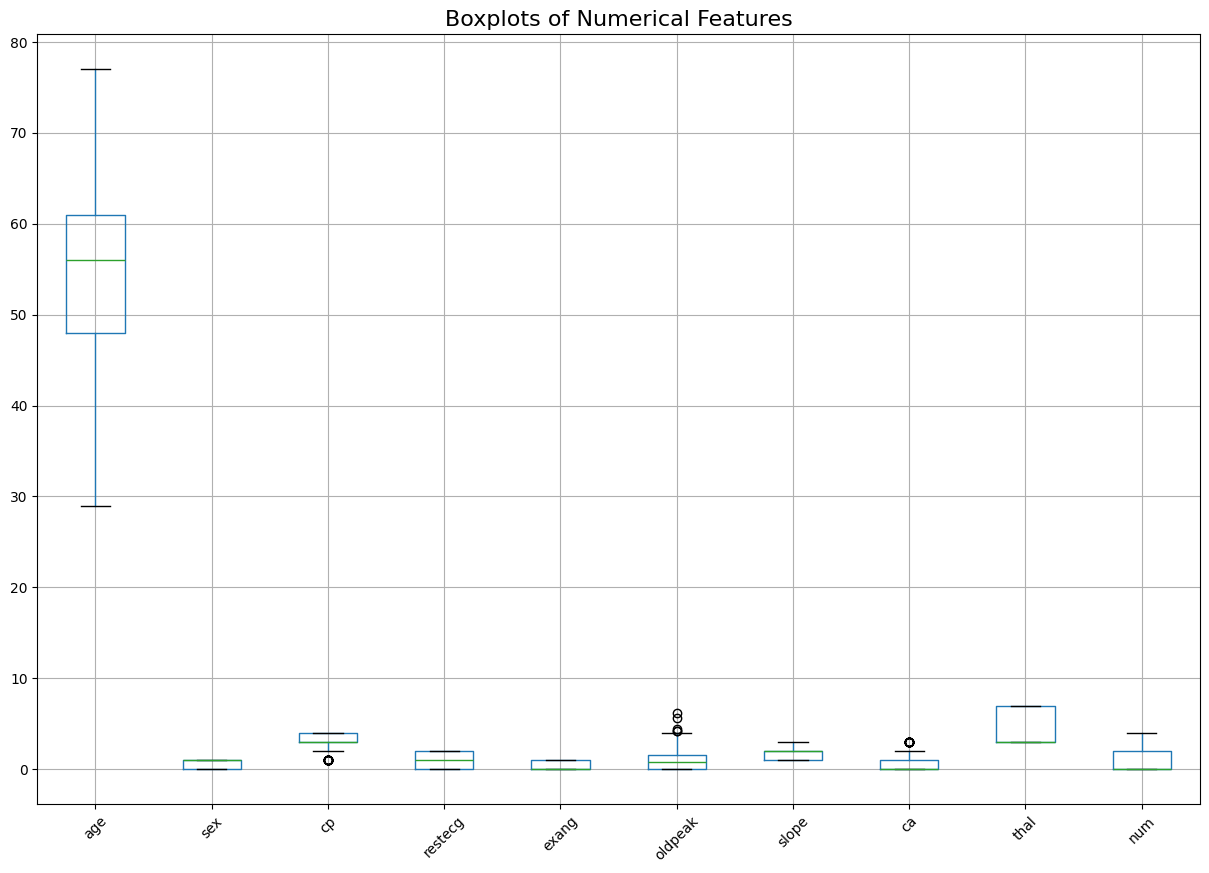

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,10))
df.boxplot()
plt.title("Boxplots of Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()


C:\Users\My Lap\AppData\Local\Temp\ipykernel_9052\3610388844.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num',data=df,palette=['g','r',"b","y","c"])


<Axes: xlabel='num', ylabel='count'>

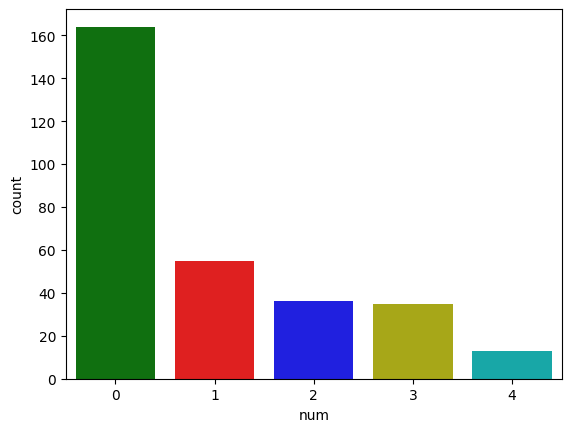

In [20]:
sns.countplot(x='num',data=df,palette=['g','r',"b","y","c"])

In [21]:
df.isnull().sum()

age        0
sex        0
cp         0
restecg    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA



# Impute missing values in X_scaled
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

pca = PCA()
X_pca = pca.fit_transform(X_scaled_imputed)


In [23]:
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

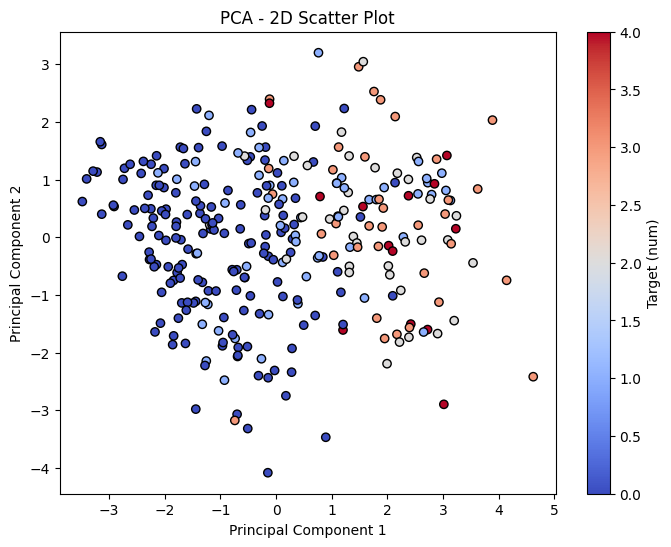

In [24]:
import matplotlib.pyplot as plt

# ناخد أول عمودين من الـ PCA
X_pca_2d = X_pca[:, :2]

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y['num'], cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Scatter Plot")
plt.colorbar(label="Target (num)")
plt.show()


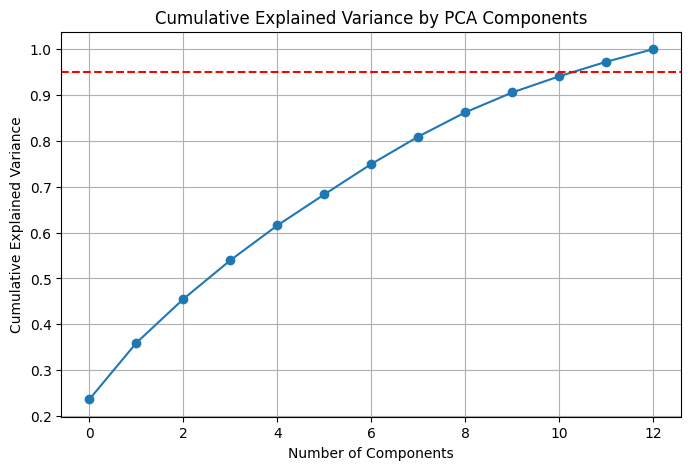

In [25]:
import numpy as np

cumulative_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(cumulative_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  
plt.show()


C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<Axes: title={'center': 'Feature Importance (Random Forest)'}>

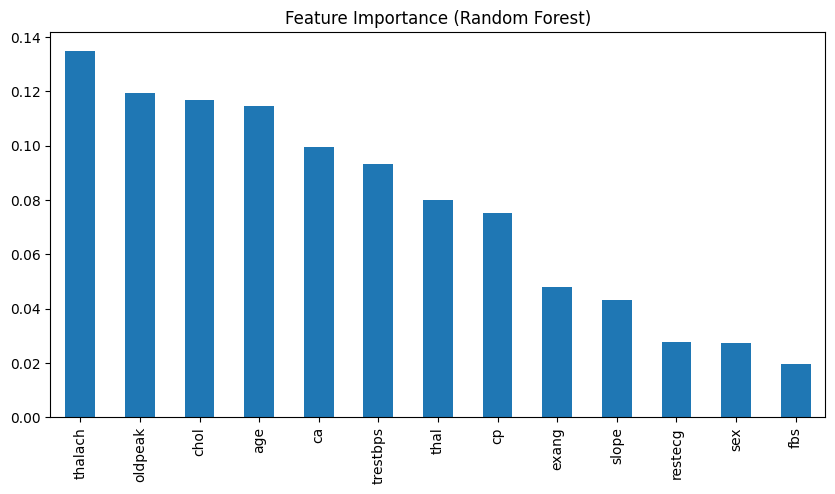

In [26]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled_imputed, y)


importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title="Feature Importance (Random Forest)")


In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5) 
fit = rfe.fit(X_scaled_imputed, y)

print("Selected features:", X.columns[fit.support_])


C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was 

Selected features: Index(['cp', 'restecg', 'oldpeak', 'ca', 'thal'], dtype='object')


C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)


imputer = SimpleImputer(strategy='mean')
X_minmax_imputed = imputer.fit_transform(X_minmax)

chi2_selector = SelectKBest(chi2, k=5)  
chi2_selector.fit(X_minmax_imputed, y)

selected_cols = X.columns[chi2_selector.get_support()]
print("Chi-Square selected features:", selected_cols)


Chi-Square selected features: Index(['exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


In [29]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(X_scaled_imputed, y, test_size=0.2, random_state=42)




In [30]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix , classification_report


# Initialize result lists if not already defined
col=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","SVC"]


def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
  
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test,average="weighted")
    f1=f1_score(pre,y_test,average="weighted")
   
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(classification_report(y_test, pre))

C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\My Lap\AppData\Roaming\Py

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.38      0.25      0.30        12
           2       0.22      0.22      0.22         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.33      0.32        61
weighted avg       0.51      0.54      0.52        61



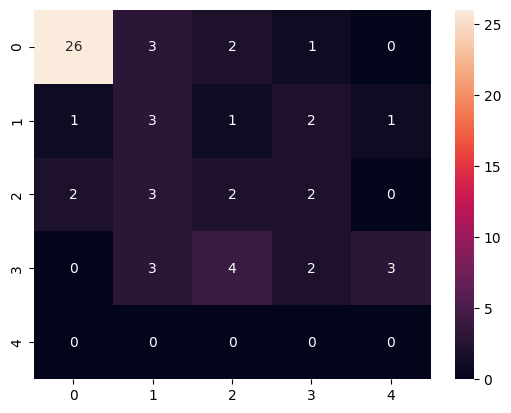

In [31]:
model1=LogisticRegression(max_iter=1000)
cal(model1)

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.42      0.42      0.42        12
           2       0.22      0.22      0.22         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.28      0.29      0.28        61
weighted avg       0.47      0.49      0.48        61



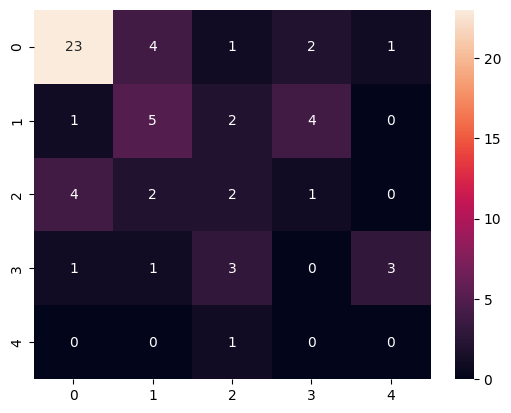

In [32]:
model2=DecisionTreeClassifier()
cal(model2)

C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\My Lap\AppData\Roaming\

              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.12      0.08      0.10        12
           2       0.11      0.11      0.11         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61



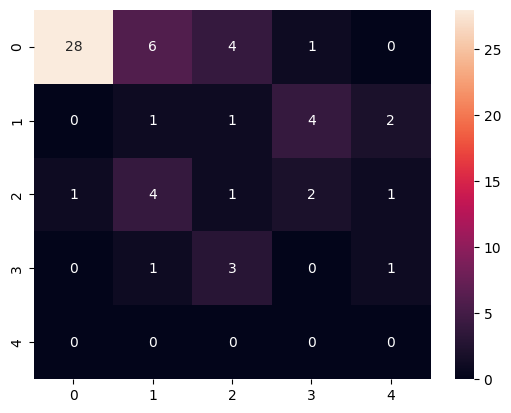

In [33]:
model3=RandomForestClassifier(class_weight='balanced',n_estimators=1000)
cal(model3)

C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\My Lap\AppData\Roaming\Py

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        29
           1       0.43      0.25      0.32        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.25      0.27      0.25        61
weighted avg       0.44      0.52      0.47        61



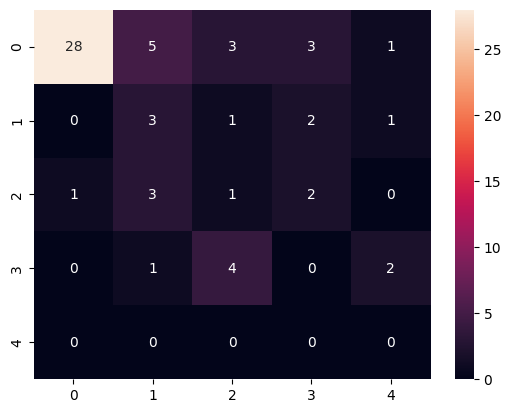

In [34]:
model4=SVC()
cal(model4)

C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


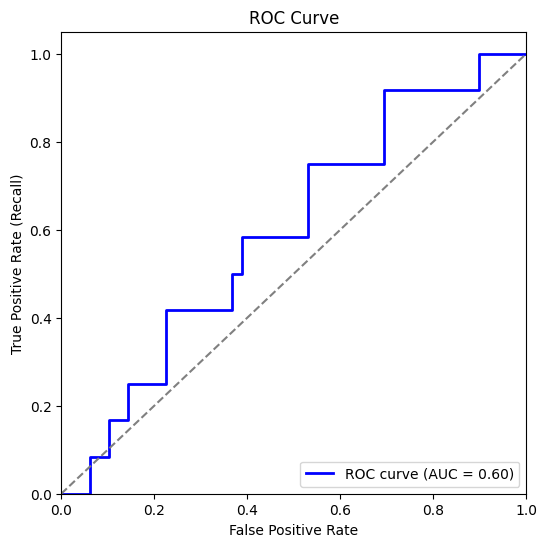

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(model, x_test, y_test):
    # Train model
    model.fit(x_train, y_train)
    y_prob = model.predict_proba(x_test)[:,1]  
    
    # ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0,1],[0,1], color="gray", linestyle="--") 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
plot_roc(log_reg, x_test, y_test)




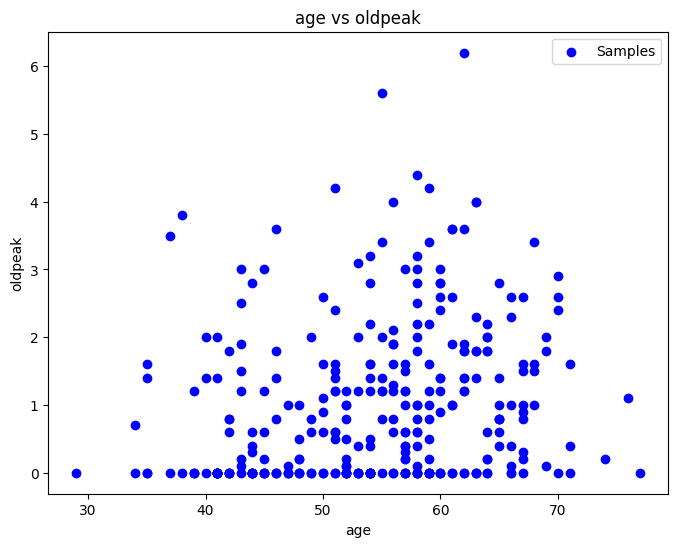

In [36]:
X = df[['age','oldpeak']]
# Plot the dataset
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c='blue', label='Samples')
plt.xlabel('age')
plt.ylabel('oldpeak')
plt.title('age vs oldpeak')
plt.legend()
plt.show()

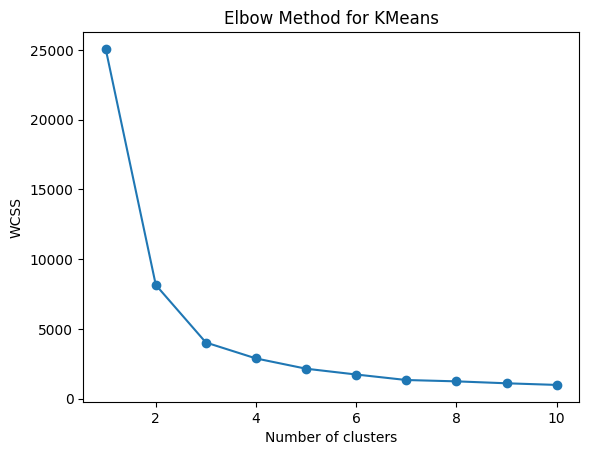

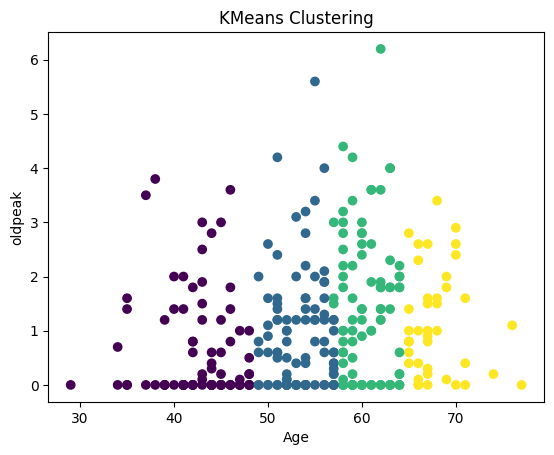

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt





wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for KMeans")
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


plt.scatter(df['age'], df['oldpeak'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Age")
plt.ylabel("oldpeak")
plt.title("KMeans Clustering")
plt.show()


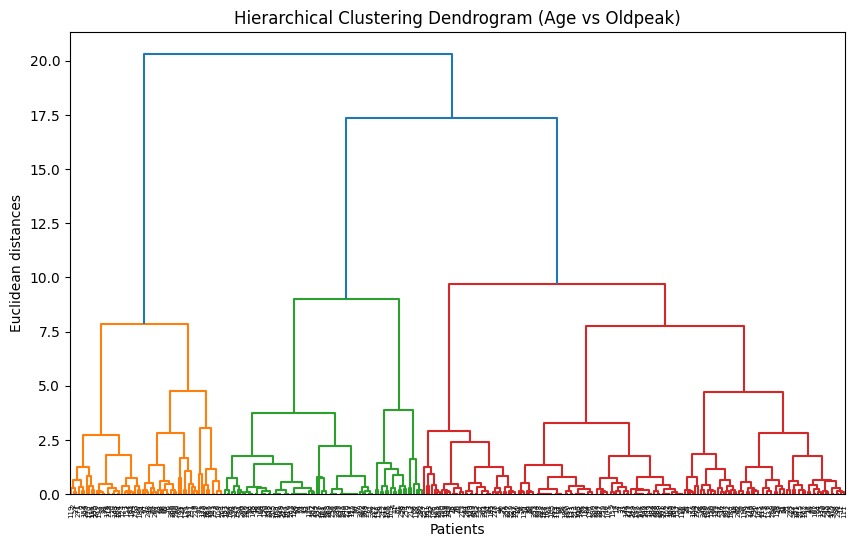

In [38]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler


X = df[['age','oldpeak']].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram (Age vs Oldpeak)")
plt.xlabel("Patients")
plt.ylabel("Euclidean distances")
plt.show()



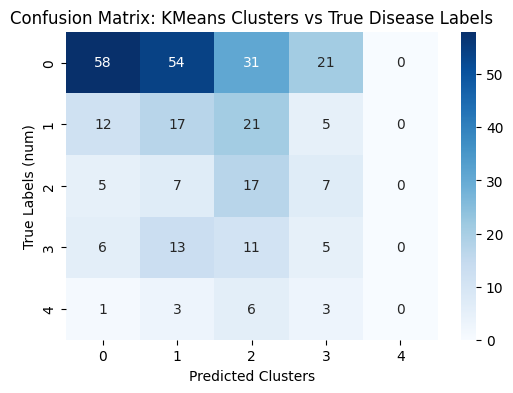

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X = df[['age','oldpeak']].values


kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)


cm = confusion_matrix(df['num'], clusters)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: KMeans Clusters vs True Disease Labels")
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels (num)")
plt.show()


In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'max_depth': 3, 'min_samples_split': 2}
Best Score: 0.5539115646258502


In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': randint(2, 20)
}
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(x_train, y_train)
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Params: {'max_depth': None, 'min_samples_split': 16}
Best Score: 0.541326530612245


In [42]:
import pickle
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model1, f)
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(model2, f)
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model3, f)
with open('svc_model.pkl', 'wb') as f:
    pickle.dump(model4, f)


# Train and Save Unsupervised Models
import pickle
from sklearn.cluster import KMeans, AgglomerativeClustering

# ===== Train =====
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Hierarchical Clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=3).fit(X)

# ===== Save Each Model Separately =====
pickle.dump(kmeans, open("kmeans_model.pkl", "wb"))
pickle.dump(hierarchical, open("hierarchical_model.pkl", "wb"))


